In [11]:
import numpy as np
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

import sys
sys.path.append("../")

from utils import create_firing_field, get_3dA

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Conjunctive firing fields

In [17]:
step_size = 0.1
env_size  = 2
b = int(env_size/step_size)

X = np.mgrid[0:env_size:step_size, 0:env_size:step_size, 0:env_size:step_size]
X = X.reshape((3,-1)).T
X = X - env_size*0.5


f = np.ones((5, b,b,b))
A = np.zeros((5,2,3))
for i in range(1,5):    

    if i==1:
        Q = np.eye(3)
    else:
        Q = ortho_group.rvs(3)

    A[i-1] = np.dot( get_3dA(s=1.), Q)
    
    g = create_firing_field(X, A[i-1])
    g = g.reshape((b,b,b))
    f[i] = f[i-1]*g

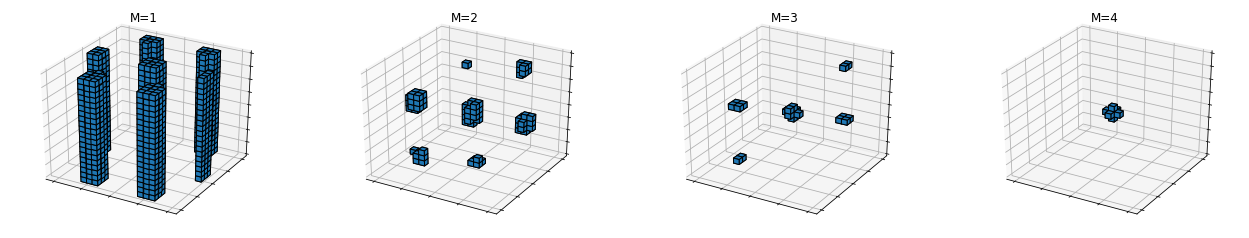

In [18]:
"""
    Figure 4b-c (top row)
"""

fig = plt.figure(figsize=(22,4))

thresh = 0.7
for i in range(1,5):
    ax = fig.add_subplot(1, 4, i, projection='3d')
    ax.set_title("M={}".format(i))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    g = f[i]
    voxels = g > np.amax(g)*thresh
    ax.voxels(voxels, edgecolor='k')
    
plt.savefig("../Figures/Decoding_Figure_4b-c_top.pdf", dpi=300, transparent=False)


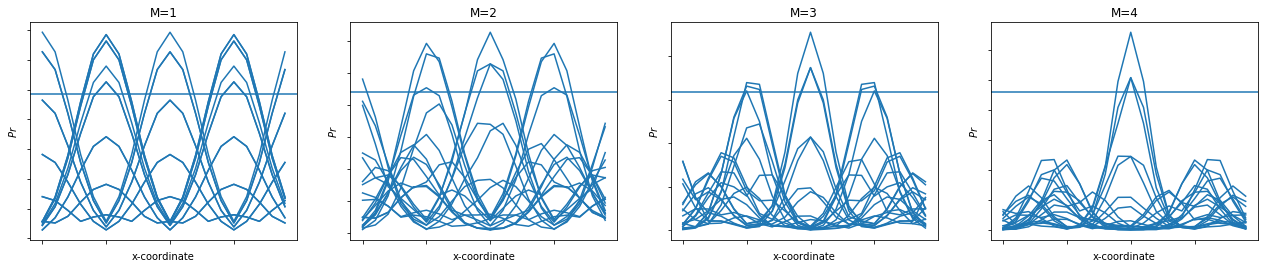

In [19]:
"""
    Figure 4b-c (bottom row)
"""

fig = plt.figure(figsize=(22,4))


for i in range(1,5):
    ax = fig.add_subplot(1, 4, i)
    ax.set_title("M={}".format(i))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("x-coordinate")
    ax.set_ylabel("$Pr$")
    
    g = f[i]
    
    ax.plot(np.max(g, axis=2), color="C0")
    ax.axhline(np.amax(g)*thresh, 0, b)
    
plt.savefig("../Figures/Decoding_Figure_4b-c_bottom.pdf", dpi=300, transparent=False)

## Firing field on tilted planes

In [72]:

step_size = 0.1
env_size  = 2
b = int(env_size/step_size)

X = np.mgrid[0:env_size:step_size, 0:env_size:step_size]
X = X.reshape((2,-1)).T
X = X - env_size*0.5


Plane_base = np.array([
    [np.cos(-np.pi/4.),0,np.sin(-np.pi/4.)],
    [0,1,0]
])

X_ = np.dot(X, Plane_base)


i = 1
img = create_firing_field(X_, A[i])
img = img.reshape((b,b))

g = f[i]
voxels = g > np.amax(g)*thresh

print img.shape

(20, 20)


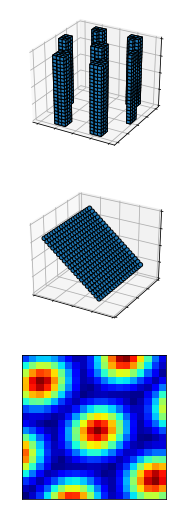

In [73]:
"""
    Figure 6 (Tilted planes)
"""
fig = plt.figure(figsize=(3,9))

ax  = fig.add_subplot(3,1,1, projection='3d')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.voxels(voxels, edgecolor='k')

ax  = fig.add_subplot(3,1,2, projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.scatter(X_[:,0],X_[:,1],X_[:,2], edgecolor='k', alpha=1, c="C0")

ax = fig.add_subplot(3,1,3)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img, cmap="jet")